In [3]:
#import pandas
import pandas as pd

# Define column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load dataset with column names
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

# Show first 5 rows
print(pima.head())


   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# Split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

# Features
X = pima[feature_cols]

# Target variable
y = pima.label

# Show first 5 rows of X
print(X.head())

# Show first 5 values of y
#print(y.head())


   pregnant  insulin   bmi  age  glucose  bp  pedigree
0         6        0  33.6   50      148  72     0.627
1         1        0  26.6   31       85  66     0.351
2         8        0  23.3   32      183  64     0.672
3         1       94  28.1   21       89  66     0.167
4         0      168  43.1   33      137  40     2.288


In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)

# Check dataset sizes
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (576, 7)
X_test shape : (192, 7)
y_train shape: (576,)
y_test shape : (192,)


C:\Users\OM\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


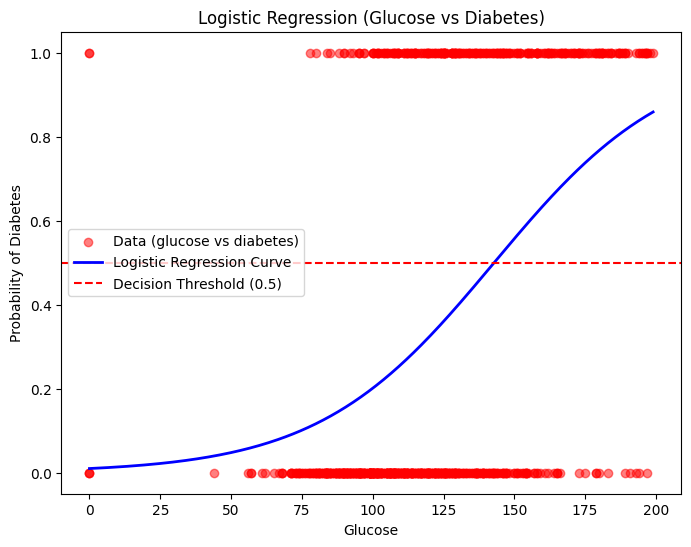

In [ ]:
# Use only glucose
X = pima[['glucose']]
y = pima['label']

# Fit logistic regression
log_glucose = LogisticRegression(solver='liblinear')
log_glucose.fit(X, y)                                                                                                                                                                                  vb   

# Range of glucose values
X_range = np.linspace(X['glucose'].min(), X['glucose'].max(), 300).reshape(-1,1)

# Predict probabilities
y_prob = log_glucose.predict_proba(X_range)[:,1]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X['glucose'], y, color='Red', alpha=0.5, label="Data (glucose vs diabetes)")
plt.plot(X_range, y_prob, color='blue', linewidth=2, label="Logistic Regression Curve")
plt.axhline(0.5, color='red', linestyle='--', label="Decision Threshold (0.5)")
plt.xlabel("Glucose")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression (Glucose vs Diabetes)")
plt.legend()
plt.show()
